In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df1 = pd.read_csv("email_spam.csv", usecols=[0,1], encoding= "latin-1")

In [3]:
df1.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
# checking the number of unique values in our text column and also spam column

print(df1['text'].nunique())
print(df1['spam'].nunique())

5697
4


In [5]:
# we want to check the values in the data, we are seeing 4 but we need only two!

print(df1['spam'].unique())

# we can see that we have some values that's not needed so we drop them

['1' '0' nan
 ' its termination would not  have such a phenomenal impact on the power situation .  however '
 ' mr suresh prabhu ']


In [6]:
# checking for null values then dropping them

print(df1['spam'].isna().sum())
df1.dropna(inplace= True)
print(df1['spam'].isna().sum())
print(df1.nunique())

2
0
text    5695
spam       4
dtype: int64


In [7]:
df1['spam'].value_counts()

spam
0                                                                                               4358
1                                                                                               1368
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: count, dtype: int64

In [8]:
df1.drop([1381, 2652], axis= 'index', inplace= True)

In [9]:
df1['spam'].value_counts()

spam
0    4358
1    1368
Name: count, dtype: int64

In [10]:
# dropped som rows now let's check our unique values and numbers

print(df1['spam'].unique())

['1' '0']


In [11]:
# changing our spam data into int

df1['spam']= df1['spam'].astype('int32')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5726 entries, 0 to 5729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5726 non-null   object
 1   spam    5726 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 111.8+ KB
None


In [12]:
# checking duplicated data

print(df1.duplicated().sum())

33


In [13]:
# dropping duplicated

df1.drop_duplicates(inplace= True)
df1.shape

(5693, 2)

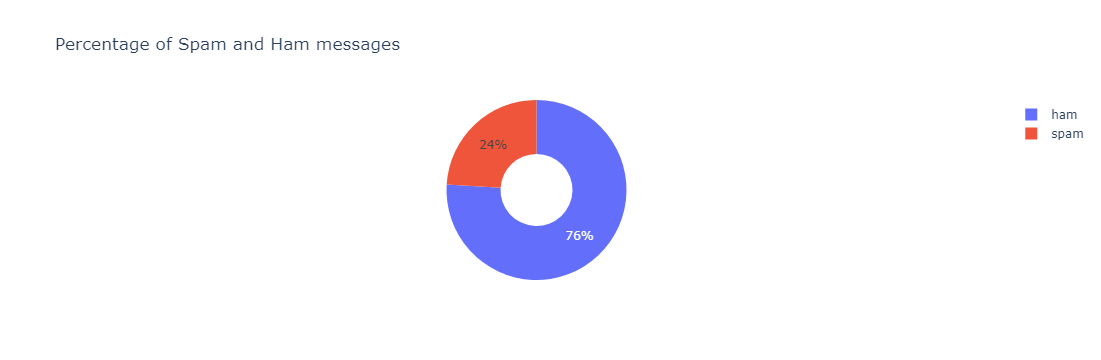

In [26]:
# ploting a pie chart graph using plotly

fig= px.pie(values= df1['spam'].value_counts(), hole=0.4, names= ["ham","spam"], title= "Percentage of Spam and Ham messages",)
fig.show()

In [15]:
df2 = pd.read_csv("combined_data.csv", names=['spam', 'text'], skiprows= 1)

In [16]:
df2 = df2[["text", "spam"]]

In [17]:
# checking the number of unique values in our text column

df2['text'].nunique()

83446

In [18]:
df2['spam'].value_counts()

spam
1    43910
0    39538
Name: count, dtype: int64

In [19]:
## changing our spam dtype
df2['spam']= df2['spam'].astype('int32')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    83448 non-null  object
 1   spam    83448 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 978.0+ KB


In [20]:
# checking for duplicates

print(df2.duplicated().sum())

0


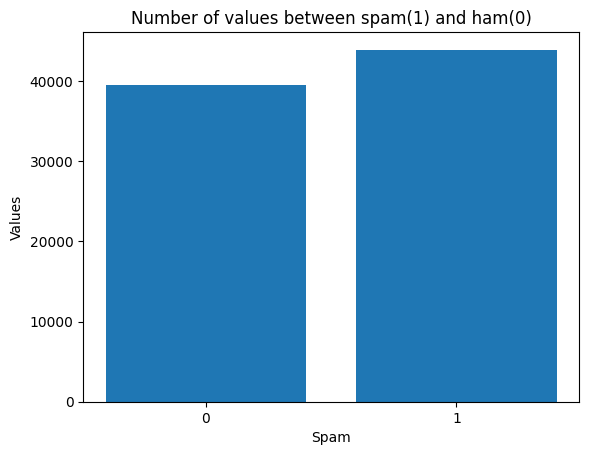

In [21]:
# ploting a bar chat for df2
plt.bar(df2['spam'].unique(),df2['spam'].value_counts().values)
plt.xticks(df2['spam'].unique())
plt.xlabel("Spam")
plt.ylabel("Values")
plt.title("Number of values between spam(1) and ham(0)")
plt.show()

In [22]:
# merging our dataframes

df= pd.concat([df1, df2], ignore_index=True)
print(df.shape)
print(df.info())

(89141, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89141 entries, 0 to 89140
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    89141 non-null  object
 1   spam    89141 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 1.0+ MB
None


In [102]:
# viewing our data
df.loc[1]

text    Subject: the stock trading gunslinger  fanny i...
spam                                                    1
Name: 1, dtype: object

In [24]:
df['spam'].value_counts()

spam
1    45278
0    43863
Name: count, dtype: int64

In [25]:
# checking duplicates

print(df.duplicated().sum())

0


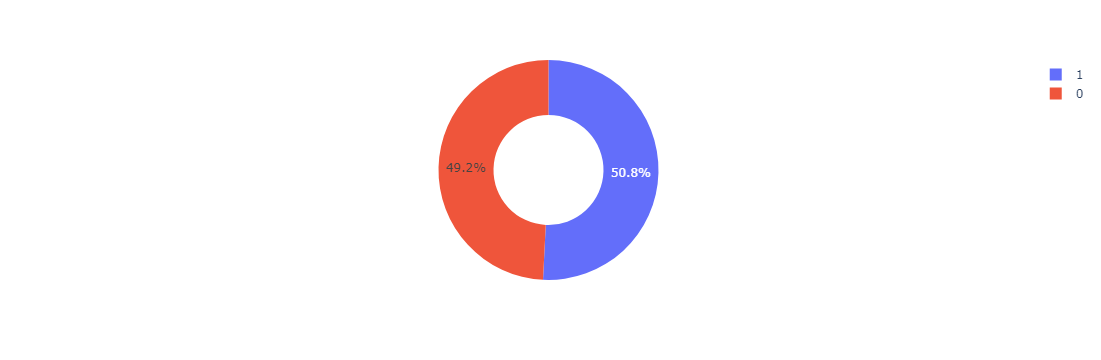

In [33]:
## visualizing our general data

fig= px.pie(values= df['spam'].value_counts().values, hole=0.5,names=df["spam"].unique())
fig.show()

In [112]:
# Splitting our data into train and test

X_train, X_test, y_train, y_test= train_test_split(df["text"], df["spam"], train_size=0.8, random_state=10)

In [76]:
X_train.shape

(71312,)

In [77]:
y_train.shape

(71312,)

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

fitting our X_train into our test converter

In [80]:
vect = CountVectorizer(stop_words='english')
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [82]:
print(vect.get_feature_names_out()[0:20])
print(vect.get_feature_names_out()[-20:])

['00' '000' '0000' '000000' '00000000' '0000000000' '000000000003619'
 '000000000003991' '000000000003997' '000000000005168' '000000000005409'
 '000000000005411' '000000000005413' '000000000005820' '000000000006238'
 '000000000006452' '000000000007399' '000000000007494' '000000000007498'
 '000000000007568']
['чо' 'что' 'ширина' 'это' 'ясно' 'ятниця' 'ӿڶ' 'אפריל' 'חמישי' 'יום'
 'מאי' 'שבת' 'שלישי' 'שני' 'シリル' 'デュモン' '中文' '写道' '拒信pt' '李俊杰']


Transforming our text to number

In [84]:
X_train_df= vect.transform(X_train)
X_test_df= vect.transform(X_test)
type(X_test_df)

scipy.sparse._csr.csr_matrix

Buliding our model with the already transformed text

In [85]:
prediction = dict()
# importing model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB()

Making Predictions

In [86]:
prediction["naive_bayes"] = model.predict(X_test_df)

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Checking Accuracy and classification report

In [94]:
accuracy_score(y_test,prediction["naive_bayes"])

0.9785742329911942

In [95]:
print(classification_report(y_test, prediction['naive_bayes'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.97      0.99      0.98      8809
        Spam       0.99      0.97      0.98      9020

    accuracy                           0.98     17829
   macro avg       0.98      0.98      0.98     17829
weighted avg       0.98      0.98      0.98     17829



Making Predictions

In [113]:

def classify(user_input):
    # Convert the input into a list
    text = [user_input]
    
    # Transform the text using the vectorizer
    transformed_text = vect.transform(text)
    
    # Predict using the model
    prediction = model.predict(transformed_text)
    
    # Return the prediction (0 = ham, 1 = spam)
    return prediction[0]

text = input('inpuut your email to confirm if it belongs to spam: ')
if classify(text) == 0:
    print('ham')
else:
    print('spam')


inpuut your email to confirm if it belongs to spam:  hey


spam


Saving our model

In [114]:
import joblib
joblib.dump(model, "Email Spam Detector.pkl")

['Email Spam Detector.pkl']